In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install transformers

     |████████████████████████████████| 2.3MB 6.9MB/s 
     |████████████████████████████████| 3.3MB 27.8MB/s 
     |████████████████████████████████| 901kB 39.7MB/s 


In [ ]:
!pip install pytorch_pretrained_bert pytorch-nlp

     |████████████████████████████████| 133kB 6.7MB/s 
     |████████████████████████████████| 92kB 5.6MB/s 
     |████████████████████████████████| 133kB 8.8MB/s 
     |████████████████████████████████| 81kB 6.2MB/s 
     |████████████████████████████████| 7.6MB 7.3MB/s 
ERROR: botocore 1.20.86 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.


In [ ]:
import re
import sys
import itertools
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import torch
from pytorch_pretrained_bert import BertModel
from torch import nn
from torchnlp.datasets import imdb_dataset
from pytorch_pretrained_bert import BertTokenizer
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import Adam
from torch.nn.utils import clip_grad_norm_
from IPython.display import clear_output

In [ ]:
rn.seed(321)
np.random.seed(321)
torch.manual_seed(321)
torch.cuda.manual_seed(321)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
!pip install sentencepiece

     |████████████████████████████████| 1.2MB 6.5MB/s 


In [ ]:
from transformers import *

class GlobalBERT:
    def __init__(self):
        self.model_class, self.tokenizer_class, self.pretrained_weights = (BertModel, BertTokenizer, 'bert-large-cased')

        self.tokenizer = self.tokenizer_class.from_pretrained(self.pretrained_weights)
        self.model = self.model_class.from_pretrained(self.pretrained_weights, output_hidden_states=True)

    def from_sentence_to_embedding(self, text, use_special_tokens=True):
        raise Exception

class BERT11Sense(GlobalBERT):
    def __init__(self):
        super().__init__()

    def from_sentence_to_embedding(self, text, use_special_tokens=True):
        input_ids = torch.tensor([self.tokenizer.encode(text,
                                                   add_special_tokens=use_special_tokens)])
        outputs = self.model(input_ids)[2]
        return (outputs[12][0]).detach().numpy()
       
       
bb = BERT11Sense()


bb.from_sentence_to_embedding("hello darling")

Some weights of the model checkpoint at bert-large-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


array([[ 0.5389201 ,  1.0641235 ,  0.06854255, ...,  0.49491492,
        -0.45627216,  0.919665  ],
       [ 0.19274744, -1.5048002 , -0.0399613 , ...,  0.22078943,
        -0.87698835,  0.87579757],
       [-0.86593825, -1.0224621 , -0.8534433 , ...,  0.34580904,
        -0.14207198,  0.37167034],
       [ 0.09797835, -0.00276921,  0.04643986, ...,  0.36611316,
        -0.05931369, -0.04601841]], dtype=float32)

In [ ]:
cd drive/My Drive/Colab Notebooks/experiments

/content/drive/My Drive/Colab Notebooks/experiments


In [ ]:
import pandas as pd
df = pd.read_csv('data/Datasets/es_lcc_new.csv')

In [ ]:
df.head(3)

,sentence,text_context_next,text_context_prev,polarity,intensity,source_concept,target_concept,label
0,También cursan en su contra 22 procesos más po...,Esos 26 mil millones de pesos (que pagaron baj...,"Sin embargo, hay otro proceso que les podría s...",NEGATIVE,3.0,BACKWARD_MOVEMENT,TAXATION,0
1,También cursan en su contra 22 procesos más po...,Esos 26 mil millones de pesos (que pagaron baj...,"Sin embargo, hay otro proceso que les podría s...",POSITIVE,3.0,BACKWARD_MOVEMENT,TAXATION,0
2,También cursan en su contra 22 procesos más po...,Esos 26 mil millones de pesos (que pagaron baj...,"Sin embargo, hay otro proceso que les podría s...",NEGATIVE,1.0,BACKWARD_MOVEMENT,TAXATION,0


In [ ]:
# Class count
count_class_0, count_class_1 = df.label.value_counts()

# Divide by class
df_class_0 = df[df['label'] == 0]
df_class_1 = df[df['label'] == 1]

Random under-sampling:
1    9270
0    9270
Name: label, dtype: int64


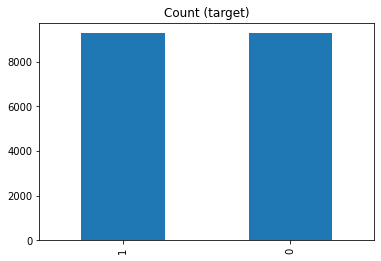

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.label.value_counts())

df_test_under.label.value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
df = df_test_under

In [ ]:
df.shape

(18540, 8)

In [ ]:
# Get the lists of sentences and their labels.
sentences = df.sentence.values.astype(str)
labels = df.label.values
labels

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
# Split to train, val and test
from sklearn.model_selection import train_test_split as tts
train, test_data = tts(df[['sentence', 'polarity', 'intensity', 'source_concept', 'target_concept', "label"]], random_state=42, test_size=0.1)
train, val = tts(train, random_state=42, test_size=test_data.shape[0])

In [ ]:
#embeddings = [np.mean(bb.from_sentence_to_embedding(k), axis = 0) for k in df["sentence"].values]

In [ ]:
#embeddings = np.array(embeddings)
#embeddings.shape

In [ ]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import train_test_split

X = df.sentence.astype(str).values
y = df.label.values

X_train, X_val, y_train, y_val =\
    train_test_split(X, y, test_size=0.1, random_state=2020)

In [ ]:
# Load test data - TroFi
#import pandas as pd
#test_data = pd.read_csv('data/Datasets/es_lcc_new.csv')

# Keep important columns
#test_data = test_data[['sentence', 'polarity', 'intensity', 'source_concept', 'target_concept']]

# Display 5 samples from the test data
#test_data.sample(5)

In [ ]:
#test_data.label.unique()
#test_data.label.value_counts()

In [ ]:
import nltk
# Uncomment to download "stopwords"
nltk.download("stopwords")
from nltk.corpus import stopwords

def text_preprocessing(s):
    """
    - Lowercase the sentence
    - Change "'t" to "not"
    - Remove "@name"
    - Isolate and remove punctuations except "?"
    - Remove other special characters
    - Remove stop words except "not" and "can"
    - Remove trailing whitespace
    """
    s = s.lower()
    # Change 't to 'not'
    s = re.sub(r"\'t", " not", s)
    # Remove @name
    s = re.sub(r'(@.*?)[\s]', ' ', s)
    # Isolate and remove punctuations except '?'
    s = re.sub(r'([\'\"\.\(\)\!\?\\\/\,])', r' \1 ', s)
    s = re.sub(r'[^\w\s\?]', ' ', s)
    # Remove some special characters
    s = re.sub(r'([\;\:\|•«\n])', ' ', s)
    # Remove stopwords except 'not' and 'can'
    s = " ".join([word for word in s.split()
                  if word not in stopwords.words('english')
                  or word in ['not', 'can']])
    # Remove trailing whitespace
    s = re.sub(r'\s+', ' ', s).strip()
    
    return s

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
X_train

array(['El nombramiento de Panetta resultó sorpresivo debido a su perfil más acorde como uno de los más visibles e influyentes operadores políticos en los   del poder.',
       'A través de este convenio las Dependencias involucradas se coordinarán para difundir una cultura del deporte en la prevención del delito como parte de las acciones tendientes a combatir la  en el .',
       'Alfonso Bonifacio Lucio Rodriguez20 de noviembre de 2011, 21:55 LA  se abuelto una forma de vivir y sobrevivir en los paises de rnta baja lapobreza que existe en el mundo es demaciado pero por mas que luchemos contra ella para erradicarla esta parece que en lugar de disminuir aumenta mas la ´pobreza es como el cancer entre mas la dejas mas  por eso luchemos por un mundo sin pobreza',
       ..., 'La  no',
       'No se requiere experiencia previa en ventas y no es necesario  ninguna  empresarial ya que toda labor post venta, soporte tecnico, facturacion y cobranza es realizada por nosotros, asi te podras en

In [ ]:
y_train

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
X_val

array(['Crear una cultura de rendición de cuentas y contribuir a la transparencia en la gestión de los recursos públicos mediante acciones de fiscalización superior, revisión y auditoría integral de las cuentas y actos relativos a la aplicación de los fondos federales,  y municipales en estricto apego a , asegurando que se ejerzan de manera eficiente en los planes y programas para los que fueron autorizados; así como fincar y promover las responsabilidades que procedan; comprometidos con los principios de legalidad, imparcialidad, veracidad, honradez, reserva y respeto.',
       'Este fantástico audiolibro que te  como gestionar algo tan valioso como el dinero para conseguir la auténtica Libertad Financiera, es la segunda parte del de "Cómo jugar y ganar el Juego del " donde encontrarás los siguientes capítulos:',
       'Es por ello que un autor como Guthrie considera que la retórica es el   "par excellence,\', ya en que su florecimiento es inconcebible bajo regímenes tiránicos.',
   

In [ ]:
y_val

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
#TF-IDF vectorizer - vectorize text data beforecreating the model

%%time
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess text
X_train_preprocessed = np.array([text_preprocessing(text) for text in X_train.astype(str)])
X_val_preprocessed = np.array([text_preprocessing(text) for text in X_val])

# Calculate TF-IDF
tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         smooth_idf=False)
X_train_tfidf = tf_idf.fit_transform(X_train_preprocessed)
X_val_tfidf = tf_idf.transform(X_val_preprocessed)

CPU times: user 1min 5s, sys: 6.41 s, total: 1min 11s
Wall time: 1min 11s


In [ ]:
# Hyperparameter Tuning

from sklearn.model_selection import StratifiedKFold, cross_val_score

def get_auc_CV(model):
    """
    Return the average AUC score from cross-validation.
    """
    # Set KFold to shuffle data before the split
    kf = StratifiedKFold(5, shuffle=True, random_state=1)

    # Get AUC scores
    auc = cross_val_score(
        model, X_train_tfidf, y_train, scoring="roc_auc", cv=kf)

    return auc.mean()

Best alpha:  1.0


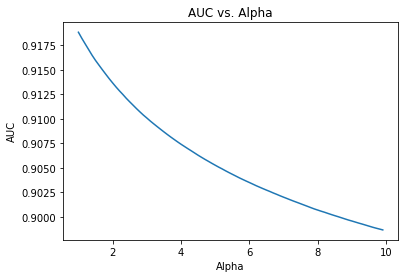

In [ ]:
# MultinomialNB - find the best alpha parameter that gives the highest CV AUC score

from sklearn.naive_bayes import MultinomialNB

res = pd.Series([get_auc_CV(MultinomialNB(i))
                 for i in np.arange(1, 10, 0.1)],
                index=np.arange(1, 10, 0.1))

best_alpha = np.round(res.idxmax(), 2)
print('Best alpha: ', best_alpha)

plt.plot(res)
plt.title('AUC vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('AUC')
plt.show()

In [ ]:
# Evaluation on validation set - model'saccuracy rate and AUC score on validation set

from sklearn.metrics import accuracy_score, roc_curve, auc

def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

AUC: 0.9160
Accuracy: 82.15%


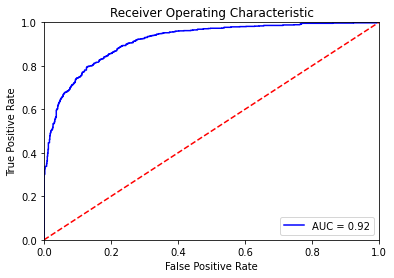

In [ ]:
# Compute predicted probabilities
nb_model = MultinomialNB(alpha=1.8)
nb_model.fit(X_train_tfidf, y_train)
probs = nb_model.predict_proba(X_val_tfidf)

# Evaluate the classifier
evaluate_roc(probs, y_val)

# This is the baseline accuracy score before finetuning

In [ ]:
#LIME
from sklearn.pipeline import make_pipeline
c = make_pipeline(tf_idf, nb_model)

In [ ]:
print(c.predict_proba([X_val[0]]))

[[9.99999995e-01 4.64451690e-09]]


In [ ]:
class_names = ['Literal', 'Metaphorical']

In [ ]:
# BERT Finetuning

In [ ]:
# Some processing before Finetuning

def text_preprocessing(text):
    """
    - Remove entity mentions (eg. '@united')
    - Correct errors (eg. '&amp;' to '&')
    @param    text (str): a string to be processed.
    @return   text (Str): the processed string.
    """
    # Remove '@name'
    text = re.sub(r'(@.*?)[\s]', ' ', text)

    # Replace '&amp;' with '&'
    text = re.sub(r'&amp;', '&', text)

    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
# Print sentence 0
print('Original: ', X[0])
print('Processed: ', text_preprocessing(X[0]))

Original:  * Es quizás más afortunado disfrutar coleccionando caracolas que el haber nacido millonario. (Robert Louis Stevenson) * Pocos hombres ricos poseen sus propiedades; son sus propiedades las que les poseen a ellos. (Robert G. Ingersoll) * Los hijos de ricos raramente son padres de ricos. (Herbert Kaufman) * La libertad produce , y la riqueza destruye la libertad. (Henry D. Lloyd) * Quiero ser rica pero no quiero hacer lo que hay que hacer para ser rica. () * El hombre es el único animal que cuanto más tiene, más quiere, el único animal que nunca está satisfecho. (Henry George)
Processed:  * Es quizás más afortunado disfrutar coleccionando caracolas que el haber nacido millonario. (Robert Louis Stevenson) * Pocos hombres ricos poseen sus propiedades; son sus propiedades las que les poseen a ellos. (Robert G. Ingersoll) * Los hijos de ricos raramente son padres de ricos. (Herbert Kaufman) * La libertad produce , y la riqueza destruye la libertad. (Henry D. Lloyd) * Quiero ser ric

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased', do_lower_case=True)

# Create a function to tokenize a set of texts
def preprocessing_for_bert(data):
    """Perform required preprocessing steps for pretrained BERT.
    @param    data (np.array): Array of texts to be processed.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
    """
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []

    # For every sentence...
    for sent in data:
        # `encode_plus` will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = tokenizer.encode_plus(
            text=text_preprocessing(sent),  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=MAX_LEN,                  # Max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length
            #return_tensors='pt',           # Return PyTorch tensor
            return_attention_mask=True      # Return attention mask
            )
        
        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

In [ ]:
# Concatenate train data and test data
all_sentences = df['sentence'].astype(str)

# Encode our concatenated data
encoded_sentences = [bb.tokenizer.encode(sent, add_special_tokens=True) for sent in all_sentences]

# Find the maximum length
max_len = max([len(sent) for sent in encoded_sentences])
print('Max length: ', max_len)

Max length:  308


In [ ]:
# Specify `MAX_LEN`
MAX_LEN = 64

# Print sentence 0 and its encoded token ids
token_ids = list(preprocessing_for_bert([X[0]])[0].squeeze().numpy())
print('Original: ', X[0])
print('Token IDs: ', token_ids)

# Run function `preprocessing_for_bert` on the train set and the validation set
print('Tokenizing data...')
train_inputs, train_masks = preprocessing_for_bert(X_train)
val_inputs, val_masks = preprocessing_for_bert(X_val)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Original:  * Es quizás más afortunado disfrutar coleccionando caracolas que el haber nacido millonario. (Robert Louis Stevenson) * Pocos hombres ricos poseen sus propiedades; son sus propiedades las que les poseen a ellos. (Robert G. Ingersoll) * Los hijos de ricos raramente son padres de ricos. (Herbert Kaufman) * La libertad produce , y la riqueza destruye la libertad. (Henry D. Lloyd) * Quiero ser rica pero no quiero hacer lo que hay que hacer para ser rica. () * El hombre es el único animal que cuanto más tiene, más quiere, el único animal que nunca está satisfecho. (Henry George)
Token IDs:  [101, 1008, 9686, 19461, 3022, 16137, 21358, 11589, 9521, 3527, 4487, 22747, 22134, 2906, 5624, 14693, 7856, 15482, 14418, 26289, 2015, 10861, 3449, 5292, 5677, 6583, 6895, 3527, 4971, 7856, 9488, 1012, 1006, 2728, 3434, 13636, 1007, 1008, 13433, 13186, 7570, 19908, 2015, 7043, 2015, 13382, 2368, 10514, 2015, 17678, 6340, 18673, 1025, 2365, 10514, 2015, 17678, 6340, 18673, 5869, 10861, 4649, 1

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2110: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Convert other data types to torch.Tensor
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)

# For fine-tuning BERT, the authors recommend a batch size of 16 or 32.
batch_size = 32

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

In [ ]:
%%time
import torch
import torch.nn as nn
from transformers import BertModel

# Create the BertClassfier class
class BertClassifier(nn.Module):
    """Bert Model for Classification Tasks.
    """
    def __init__(self, freeze_bert=False):
        """
        @param    bert: a BertModel object
        @param    classifier: a torch.nn.Module classifier
        @param    freeze_bert (bool): Set `False` to fine-tune the BERT model
        """
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 50, 2

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(H, D_out)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
        
    def forward(self, input_ids, attention_mask):
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        
        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

CPU times: user 37 µs, sys: 3 µs, total: 40 µs
Wall time: 42.7 µs


In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_model(epochs=3):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = BertClassifier(freeze_bert=False)

    # Tell PyTorch to run the model on GPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [ ]:
import random
import time

# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=10, evaluation=False):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")
    
    print("Training complete!")


def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [ ]:
import torch

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla P100-PCIE-16GB


In [ ]:
set_seed(42)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=3)
train(bert_classifier, train_dataloader, val_dataloader, epochs=3, evaluation=True)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.703901   |     -      |     -     |   4.48   
   1    |   40    |   0.672402   |     -      |     -     |   4.14   
   1    |   60    |   0.659618   |     -      |     -     |   4.14   
   1    |   80    |   0.664026   |     -      |     -     |   4.15   
   1    |   100   |   0.635588   |     -      |     -     |   4.15   
   1    |   120   |   0.618762   |     -      |     -     |   4.15   
   1    |   140   |   0.591427   |     -      |     -     |   4.15   
   1    |   160   |   0.577834   |     -      |     -     |   4.15   
   1    |   180   |   0.604856   |     -      |     -     |   4.15   
   1    |   200   |   0.564008   |     -      |     -     |   4.15   
   1    |   220   |   0.531672   |     -      |     -     |   4.15   
   1    |   240   |   0.538205   |     -      |     -     |   4.16   


In [ ]:
import torch.nn.functional as F

def bert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
    
    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc

def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

AUC: 0.9247
Accuracy: 84.95%


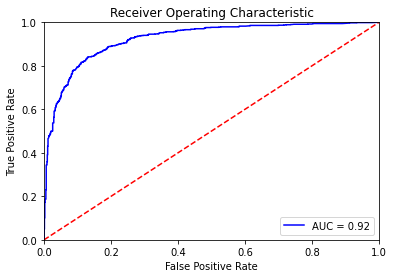

In [ ]:
# Compute predicted probabilities on the test set
probs = bert_predict(bert_classifier, val_dataloader)

# Evaluate the Bert classifier
evaluate_roc(probs, y_val)

In [ ]:
preds = probs[:, 1]
y_pred = np.where(preds >= 0.5, 1, 0)

#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_val, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_val, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_val, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_val, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_val, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_val, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_val, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_val, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_val, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_val, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_val, y_pred, average='weighted')))

Confusion Matrix

[[792 141]
 [138 783]]

Accuracy: 0.85

Micro Precision: 0.85
Micro Recall: 0.85
Micro F1-score: 0.85

Macro Precision: 0.85
Macro Recall: 0.85
Macro F1-score: 0.85

Weighted Precision: 0.85
Weighted Recall: 0.85
Weighted F1-score: 0.85


In [ ]:
def get_predictions(model, data_loader):
  model.eval()
  
  sentence_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["sentence_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      sentence_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return sentence_texts, predictions, prediction_probs, real_values

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_val, y_pred, target_names=['Literal','Metaphorical']))


Classification Report

              precision    recall  f1-score   support

     Literal       0.85      0.85      0.85       933
Metaphorical       0.85      0.85      0.85       921

    accuracy                           0.85      1854
   macro avg       0.85      0.85      0.85      1854
weighted avg       0.85      0.85      0.85      1854



In [ ]:
#import torch
#torch.save(bert_classifier, 'bert_finetuned.pth')

#saved_model = torch.load('bert_finetuned.pth')

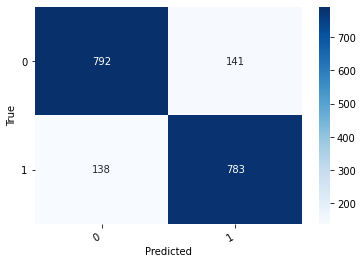

In [ ]:
import seaborn as sns
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True')
  plt.xlabel('Predicted');

cm = confusion_matrix(y_val, y_pred)
#df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(cm)

#Predictions on Test Set

In [ ]:
test_data.sample(5)

,sentence,polarity,intensity,source_concept,target_concept,label
18003,"Obtener la constancia de inscripción, registro...",NaN,NaN,NaN,GOVERNMENT,0
16885,Crear una cultura de rendición de cuentas y co...,NaN,NaN,NaN,DEMOCRACY,0
17299,"En el de la consejera Olga Lazcano Ponce, la ...",NaN,NaN,NaN,DEMOCRACY,0
6034,"Si bien la idea no es mala, es poco probable q...",POSITIVE,1.0,RULE_ENFORCER,TAXATION,1
7600,Señalaron que desde el 28 de marzo del 2007 la...,NEGATIVE,2.0,BUILDING,DEMOCRACY,1


In [ ]:
es_lcc = pd.read_csv("data/Datasets/es_lcc_new.csv")

In [ ]:
es_lcc.sample(5)

,sentence,text_context_next,text_context_prev,polarity,intensity,source_concept,target_concept,label
6698,Transcurrido este periodo de cambios en el act...,Persiste el déficit de vivienda,"En conclusión, las reformas estructurales apli...",NEGATIVE,2.0,UPWARD_MOVEMENT,POVERTY,1
2221,Muchas personas que de la en los últimos año...,"WASHINGTON, EU.-El Banco Interamericano de Des...",El BID pronostica que en 2009 el crecimiento r...,POSITIVE,2.0,CONFINEMENT,POVERTY,1
11524,La tecnología de los lentes de medida modernos...,Ahora que sabe un poco más acerca de sus opcio...,Usted puede incluso elegir lentes modernos y p...,NaN,NaN,NaN,ELECTIONS,0
13730,Por lo visto preferis que siga gobernando el P...,Parece mentira que todavía no les conozcais y ...,A Charles Bronson y Berto: Parece que ahora to...,NaN,NaN,NaN,TAXPAYERS,0
15041,Presencia Ciudadana está promoviendo dos inici...,"De tal forma, distintos representantes de la s...",Compromisos Ambientales de Candidatos,NaN,NaN,NaN,DEMOCRACY,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


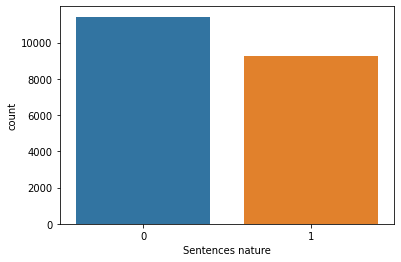

In [ ]:
import seaborn as sns
sns.countplot(es_lcc.label)
plt.xlabel('Sentences nature');

In [ ]:
es_lcc.label.value_counts()

0    11424
1     9270
Name: label, dtype: int64

In [ ]:
# Run `preprocessing_for_bert` on the test set
print('Tokenizing data...')
test_inputs, test_masks = preprocessing_for_bert(test_data.sentence.astype(str))

# Create the DataLoader for our test set
test_dataset = TensorDataset(test_inputs, test_masks)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=32)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2110: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Tokenizing data...


#Predictions

In [ ]:
# Compute predicted probabilities on the test set
probs = bert_predict(bert_classifier, test_dataloader)

# Get predictions from the probabilities
threshold = 0.4
preds = np.where(probs[:, 1] > threshold, 1, 0)

# Number of tweets predicted non-negative
print("Number of tweets predicted non-metaphorical: ", preds.sum())

Number of tweets predicted non-metaphorical:  955


In [ ]:
output = pd.DataFrame({'sentence': test_data.sentence,
                       'correct_label': test_data.label,
                       'prediction': preds,
                       'polarity': test_data.polarity,
                       'intensity': test_data.intensity,
                       'source_concept': test_data.source_concept,
                       'target_concept': test_data.target_concept})
output.to_csv('submission.csv', index=False)

In [ ]:
predictions = pd.read_csv("submission.csv")

In [ ]:
predictions.head()

,sentence,correct_label,prediction,polarity,intensity,source_concept,target_concept
0,"Y otra más, es que aunque al inicio de año hab...",1,1,NEGATIVE,3.0,CONFINEMENT,POVERTY
1,".......Al concluir el bachillerato, continuó s...",0,0,NaN,NaN,NaN,GOVERNMENT
2,"Dice, sin embargo, no tener datos duros para c...",0,0,NaN,NaN,NaN,DRUG_TRAFFICKING
3,“El ejido en México –y la comunal– han fracas...,0,0,NaN,NaN,NaN,GOVERNMENT
4,Presencia Ciudadana está promoviendo dos inici...,0,0,NaN,NaN,NaN,GOVERNMENT


In [ ]:
predictions.shape

(1854, 7)

In [ ]:
final = predictions[(predictions['correct_label'] == predictions['prediction'])]

In [ ]:
final.shape

(1706, 7)

In [ ]:
correct_met = predictions[(predictions['correct_label'] == 1) & (predictions['prediction'] ==1)]

In [ ]:
correct_met.shape

(873, 7)

In [ ]:
#correct_met.to_csv("mohx_lcc_correct_metaphors.csv", index=False)

In [ ]:
#correct_met = pd.read_csv("mohx_lcc_correct_metaphors.csv")

In [ ]:
correct_met.head()

,sentence,correct_label,prediction,polarity,intensity,source_concept,target_concept
0,"Y otra más, es que aunque al inicio de año hab...",1,1,NEGATIVE,3.0,CONFINEMENT,POVERTY
7,"La filosofía es para la libertad la de una , ...",1,1,POSITIVE,2.0,PHYSICAL_HARM,DEMOCRACY
8,"Reporte Indigo (edición 272): de - YouTube: "" """,1,1,NEUTRAL,0.0,ANIMAL,TAXATION
9,"En México, las remesas representan entre 3 y 4...",1,1,NEGATIVE,2.0,POSITION_AND_CHANGE_OF_POSITION_ON_A_SCALE,POVERTY
10,"Sin embargo, la publicación advierte que la pr...",1,1,NEGATIVE,1.0,UPWARD_MOVEMENT,POVERTY


In [ ]:
wrong_met = predictions[(predictions['correct_label'] == 1) & (predictions['prediction'] ==0)]

In [ ]:
wrong_met.shape

(66, 7)

In [ ]:
#wrong_met.to_csv("mohx_lcc_correct_metaphors.csv", index=False)

In [ ]:
#wrong_met = pd.read_csv("mohx_lcc_correct_metaphors.csv")

In [ ]:
#wrong_met.head()

In [ ]:
final_lit = predictions[(predictions['correct_label'] == 0) & (predictions['prediction'] ==0)]

In [ ]:
final_lit.shape

(833, 7)

In [ ]:
correct_lit = predictions[(predictions['correct_label'] == 0) & (predictions['prediction'] ==0)]

In [ ]:
correct_lit.shape

(833, 7)

In [ ]:
wrong_lit = predictions[(predictions['correct_label'] == 0) & (predictions['prediction'] ==1)]

In [ ]:
wrong_lit.shape

(82, 7)